In [12]:
import tensorflow as tf
from tensorflow.keras.layers import *
import numpy as np
import glob
import librosa.display
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from keras.models import Sequential, Model
from tensorflow.keras.layers import *
from keras.models import *
from keras.initializers import he_normal, glorot_uniform
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import mixed_precision
tf.keras.mixed_precision.experimental.Policy('mixed_float16')
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import *
from keras.models import Sequential, Model
from tensorflow.keras import mixed_precision
import soundfile as sf
import random
sr = 16000
audio_length = 48298
import librosa

ModuleNotFoundError: No module named 'librosa'

In [8]:
audio, sampling_rate = librosa.load('./audios/0_1.wav', sr=16000)

NameError: name 'librosa' is not defined

In [9]:
sampling_rate 

NameError: name 'sampling_rate' is not defined

In [16]:
0
48298
48298+48298

0

In [19]:
150*100 # forgot the reaseon

15000

In [18]:
j = 1
cleans = os.listdir('./audios/')
# cleans[0:100]
import random
random.shuffle(cleans)
# cleans[0:100]
audio = np.array([])
for i in range(1, len(cleans)):
#     print(librosa.load(cleans[i]))
    loaded_clean, sr = librosa.load('./audios/'+cleans[i], sr=16000)
    audio = np.concatenate((audio, loaded_clean))
    
    if i % 100 == 0:
        print(audio.shape, loaded_clean.shape, sr)
        np.save('./segments/segment_clean_'+str(j)+'.npy', audio)
        audio = np.array([])
        j = j + 1

(4829800,) (48298,) 16000
(4829800,) (48298,) 16000
(4829800,) (48298,) 16000
(4829800,) (48298,) 16000
(4829800,) (48298,) 16000
(4829800,) (48298,) 16000
(4829800,) (48298,) 16000
(4829800,) (48298,) 16000
(4829800,) (48298,) 16000
(4829800,) (48298,) 16000
(4829800,) (48298,) 16000
(4829800,) (48298,) 16000
(4829800,) (48298,) 16000
(4829800,) (48298,) 16000
(4829800,) (48298,) 16000
(4829800,) (48298,) 16000
(4829800,) (48298,) 16000
(4829800,) (48298,) 16000
(4829800,) (48298,) 16000
(4829800,) (48298,) 16000
(4829800,) (48298,) 16000


KeyboardInterrupt: 

In [20]:
AUDIO = np.array([])
segments = os.listdir('./segments')
for segment in segments:
    AUDIO = np.concatenate((AUDIO, np.load('./segments/'+segment)))

In [22]:
AUDIO.shape

(101425800,)

In [23]:
150*100*48298

724470000

In [19]:
np.save('./AUDIO.npy', AUDIO)

In [24]:
AUDIO = np.load('AUDIO.npy')
NOISE = np.load('noise.npy')

In [26]:
AUDIO.shape

(327302911,)

In [35]:
import soundfile as sf
sf.write('test12345.wav', NOISE[252847149-audio_length:252847149], sr)

In [48]:
def addRandomNoise(audio):
    noise = np.array([])
    while (noise.shape[-1] == 0):
        rand = random.randint(0, NOISE.shape[-1])
        noise = NOISE[rand-audio_length:rand]
    return noise*0.2 + audio

In [38]:
AUDIO.shape[-1]*0.8 + AUDIO.shape[-1]*0.1

652023000.0

In [41]:
train_slice = round(AUDIO.shape[-1]*0.8)
val_slice = round(train_slice + AUDIO.shape[-1]*0.1)
print(train_slice, val_slice)

train = AUDIO[0:train_slice]
val = AUDIO[train_slice:val_slice] # 10 percent validation
test = AUDIO[val_slice:-1] # Remaining 10 percent test
print(train.shape)
print(val.shape)
print(test.shape)

579576000 652023000
(579576000,)
(72447000,)
(72446999,)


In [43]:
train.shape[-1]//audio_length

12000

In [44]:
12000*audio_length

579576000

In [ ]:
0, 1, 2, 3, 4, 19
first loop =>
start = 40*48298
end = 40*48298 + 48298 = 40*48298 (3 sec audio)

batch_start = 40
batch_end = 60
40, 41...59

In [62]:
trim_size = audio_length
batch_size = 20

def load_audio(audio, batch_start, batch_end, maximum, noise=False):
    l = []
    for i in range(batch_start, batch_end):
        start = i*trim_size
        end = 0
        
        if (start + trim_size) > maximum:
            start = 0
            end = trim_size
        else:
            end = start + trim_size
        
        if noise:
            audi = addRandomNoise(audio[start:end])
        else:
            audi = audio[start:end]
        stft = librosa.stft(audi, n_fft=622) # 312x312 complex128 i j
#         print(stft, 'complex128 STFT')
#         print(np.real(stft), 'Real numbered STFT float64')
#         print(np.float32())
        stft = np.float32(np.real(stft))
        stft = np.expand_dims(stft, axis=-1) #(312, 312)
        l.append(stft)
    return np.array(l)
    
def loader(audio):
    L = audio.shape[-1]//trim_size
    while True:
        batch_start = 0
        batch_end = batch_size
        while batch_start < L:
            limit = min(batch_end, L)
            X = load_audio(audio, batch_start, batch_end, audio.shape[-1], noise=True)
            Y = load_audio(audio, batch_start, batch_end, audio.shape[-1], noise=False)
            yield (X,Y)
            batch_start += batch_size   
            batch_end += batch_size
            
train_loader = loader(train)

In [63]:
x = train_loader.__next__()
nn,cc = x


In [58]:

print(n.shape, 'n.shape')

n = nn[2, :, :, 0]
c = cc[2, :, :, 0]

print(np.float32(np.real(n)).dtype)

n = librosa.istft(n)
c = librosa.istft(c)

import soundfile as sf
sf.write('test_noisy_train.wav', n, sr)
sf.write('test_clean_train.wav', c, sr)

(48205,) n.shape
float32


In [65]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, LearningRateScheduler
import keras.backend as K
x1 = 312
x2 = 312

def residual_block(x, f):
    init = x
    c1 = Conv2D(f, 3, strides=1, padding='same', activation='relu')(x)
    c1 = BatchNormalization()(c1)
    c1 = Conv2D(f, 3, strides=1, padding='same', activation='relu')(c1)
    c1 = BatchNormalization()(c1)
    
    c1_identity = Conv2D(f, 1, strides=1, padding='same', activation='relu')(x)
    c1_identity = BatchNormalization()(c1_identity)
    
    c1 = Add()([c1, c1_identity])
    return c1


def cleaner(x1, x2):

    f = 16
    x = Input(shape=(x1,x2,1,))
    
    
    c1 = residual_block(x, f)
    m1 = MaxPooling2D(pool_size=(2, 2))(c1)
    
    c2 = residual_block(m1, f*2)
    m2 = MaxPooling2D(pool_size=(2, 2))(c2)
    
    c3 = residual_block(m2, f*4)
    m3 = MaxPooling2D(pool_size=(2, 2))(c3)
    
    
    c4 = residual_block(m3, f*8)
    

    
    c3_t = Conv2DTranspose(f*4, 3, strides=2, padding='same')(c4)
    c3_t = concatenate([c3_t, c3])
    c3_t = residual_block(c3_t, f*4)
    
    c2_t = Conv2DTranspose(f*2, 3, strides=2, padding='same')(c3_t)
    
    c2_t = concatenate([c2_t, c2])
    c2_t = residual_block(c2_t, f*2)
    
    c1_t = Conv2DTranspose(f*1, 3, strides=2, padding='same')(c2_t)
    
    c1_t = concatenate([c1_t, c1])
    c1_t = residual_block(c1_t, f)
    
    final = Conv2D(1, 3, strides=1, padding='same', activation='linear')(c1_t)
    
    model = Model(inputs=x, outputs=final)

    return model

model = cleaner(x1, x2)
model.summary()

# Taken from https://stackoverflow.com/questions/68598751/noise-to-signal-ratio-custom-loss-function-in-keras-not-working
def noiseToSignalLoss(y_true, y_pred):
    losses = tf.math.divide(
        tf.math.reduce_sum(
            tf.math.pow(
                tf.math.abs(
                    tf.math.subtract(
                        y_true,
                        y_pred
                    )
                ),
                2
            )
        ),
        tf.math.reduce_sum(
            tf.math.pow(tf.math.abs(y_true),2)
        )
    )
    return tf.reduce_mean(losses)


metrics = ['mse', 'mae']
optimizer = Adam(0.001)
csv_logger = CSVLogger("./log.csv")

checkpoint = ModelCheckpoint('./0001.h5', save_freq="epoch",save_best_only=True,
    save_weights_only=False)

model.compile(optimizer = optimizer, loss=noiseToSignalLoss, metrics=metrics)

train_steps = (train.shape[-1]//trim_size)//batch_size
val_steps = (val.shape[-1]//trim_size)//batch_size

train_loader = loader(train)
val_loader = loader(val)

history=model.fit(train_loader,
        steps_per_epoch=train_steps,
        epochs=500,
        verbose=1,
        validation_data=val_loader,
        validation_steps=val_steps, callbacks=[checkpoint, csv_logger]
)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 312, 312, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 312, 312, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 312, 312, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 312, 312, 16) 2320        batch_normalization[0][0]        
_______________________________________________________________________________________

Epoch 1/500


KeyboardInterrupt: 

In [66]:
model = load_model('./0001.h5', custom_objects={'noiseToSignalLoss': noiseToSignalLoss})

In [67]:
test_loader = loader(test)

In [80]:
x = test_loader.__next__()
print(x[0].shape)
pr = model.predict(x[0])
print(pr.shape, 'prediction shape')
stft = pr[0, :, :, 0]
print(x[0][0, :, :, 0].shape, 'noisy stft shape')
ns = librosa.istft(x[0][0, :, :, 0])
print(ns.shape, 'after inverse stft shape')
prr = librosa.istft(stft)
print(prr.shape, 'prediction istft shape')
sf.write('pred.wav', prr, sr)
sf.write('noise.wav', ns, sr)

sf.write('gt.wav', librosa.istft(x[1][0, :, :, 0]), sr)


(20, 312, 312, 1)
(20, 312, 312, 1) prediction shape
(312, 312) noisy stft shape
(48205,) after inverse stft shape
(48205,) prediction istft shape


In [34]:
x[1][0, :, :].shape

(312, 312, 1)

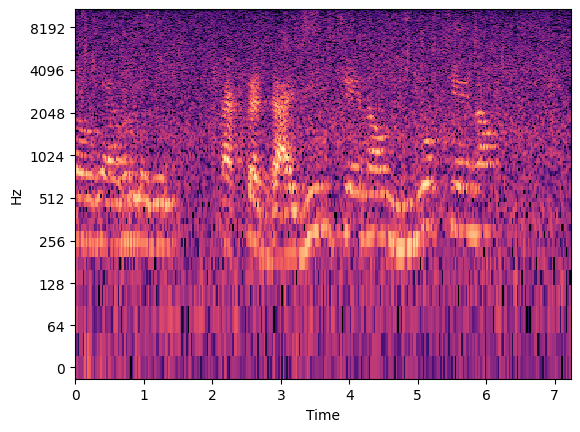

In [87]:
librosa.display.specshow(librosa.amplitude_to_db(x[0][2, :, :, 0], ref=np.max), y_axis='log', x_axis='time')

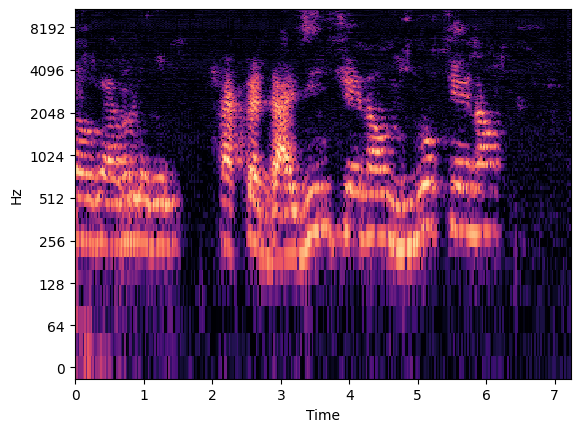

In [88]:
librosa.display.specshow(librosa.amplitude_to_db(pr[2, :, :, 0], ref=np.max), y_axis='log', x_axis='time')

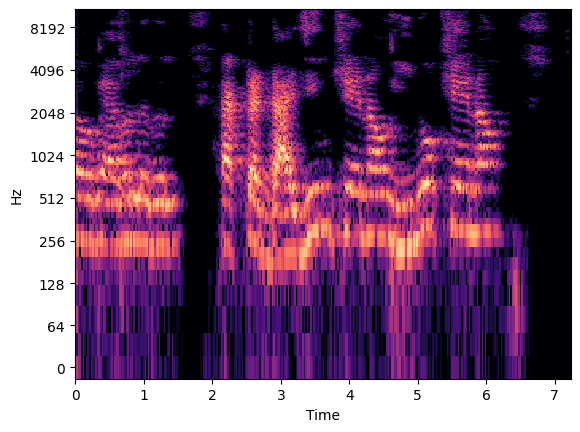

In [89]:
librosa.display.specshow(librosa.amplitude_to_db(x[1][2, :, :, 0], ref=np.max), y_axis='log', x_axis='time')